In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
datapath = '/content/drive/MyDrive/Retinal Research/2025/stock images'

In [ ]:
## Importing neccessary libraries
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# image dimensions and batch size specification
img_width, img_height = 150, 150  
batch_size = 32

# Data Generators 
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input, # VGG16 preprocessing
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    datapath,  
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    datapath,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Loading pre-trained VGG16 model (without top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Adding custom classification layers 
x = base_model.output
x = Flatten()(x) # Flattening before dense layers
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x) # Addeding another dense layer
predictions = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

model = Model(inputs=base_model.input, outputs=predictions)

# Freezing the base model layers
for layer in base_model.layers:
    layer.trainable = False  # Freezing all VGG16 layers initially

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Saving the model
model.save('vgg16_binary_classification.keras')

Found 160 images belonging to 2 classes.
Found 17 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.5881 - loss: 6.8137 - val_accuracy: 0.7647 - val_loss: 8.4631
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7471 - loss: 4.1526 - val_accuracy: 0.4706 - val_loss: 5.1240
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 829ms/step - accuracy: 0.6890 - loss: 1.4392 - val_accuracy: 0.7059 - val_loss: 1.6002
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 876ms/step - accuracy: 0.7902 - loss: 1.4976 - val_accuracy: 0.6471 - val_loss: 3.8033
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 955ms/step - accuracy: 0.7586 - loss: 1.8763 - val_accuracy: 0.5882 - val_loss: 2.1217
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 859ms/step - accuracy: 0.8601 - loss: 0.9746 - val_accuracy: 0.5882 - val_loss: 1.9959
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 932ms/step - accuracy: 0.8254 - loss: 1.3653 - val_accuracy: 0.4706 - val_loss: 2.7748
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 870ms/step - accuracy: 0.8336 - loss: 0.7257 - val_accuracy: 0.4118 - val_loss: 2.3

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_labels = train_generator.class_indices

print("Class Names:", class_names)
print("Class Labels:", class_labels)

Class Names: ['healthy', 'unhealthy']
Class Labels: {'healthy': 0, 'unhealthy': 1}


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Loading the saved VGG16 model
model = tf.keras.models.load_model('vgg16_binary_classification.keras') 

# VGG16 preprocessing
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)
    return img_array

# Predicting the class 
image_path = '/content/drive/MyDrive/Retinal Research/2025/stock images/healthy/`183b.jpg'  
preprocessed_image = preprocess_image(image_path)
prediction = model.predict(preprocessed_image)

# Print the prediction
print(f"Prediction: {prediction}")

# Interpret the prediction
if prediction > 0.5:
    print("Predicted class: 1 - The patient is unhealthy")
else:
    print("Predicted class: 0 -  The patient is healthy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
Prediction: [[0.03249884]]
Predicted class: 0 -  The patient is healthy


MODEL EXPLAINABILITY - RESPONSIBLE AI 

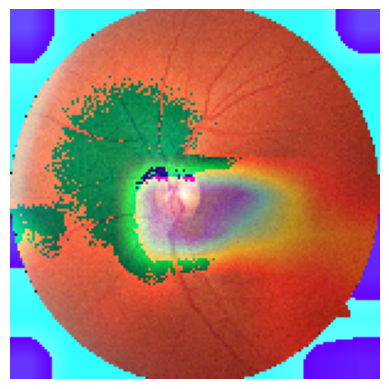

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
Prediction: [[0.03249884]]
Predicted class: 0 - The patient is healthy


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

model = tf.keras.models.load_model('vgg16_binary_classification.keras')

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150)) 
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array) 
    return img_array, img

# Grad-CAM function
def grad_cam(model, img_array, layer_name='block5_conv3'):  # 'block5_conv3' is the last convolutional layer of VGG16
    
    grad_model = tf.keras.models.Model(
        inputs=[model.input],
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    # Getting the gradient of the top predicted class of the last convolutional layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        # For binary classification, we are use in the first class
        loss = predictions[:, 0]  

    # Getting the gradients of the loss convolutional outputs
    grads = tape.gradient(loss, conv_outputs)

    # Averaging the gradients over all the axes
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Converting conv_outputs to a NumPy array
    conv_outputs = conv_outputs.numpy()[0]

    # Multiplying each channel in the feature map with the corresponding gradient
    for i in range(conv_outputs.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    # Averaging the feature map across all channels
    heatmap = np.mean(conv_outputs, axis=-1)

    # Normalizing the heatmap to the range [0, 1]
    heatmap = np.maximum(heatmap, 0)
    heatmap = heatmap / np.max(heatmap)

    return heatmap

# Superimposing the heatmap on the image
def superimpose_heatmap(img, heatmap, alpha=0.4):
    img = np.array(img)
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Converting the heatmap to RGB
    heatmap_rgb = np.uint8(255 * heatmap_resized)
    heatmap_rgb = cv2.applyColorMap(heatmap_rgb, cv2.COLORMAP_JET)

    # Superimposing the heatmap onto the image
    superimposed_img = heatmap_rgb * alpha + img
    return np.uint8(superimposed_img)


image_path = '/content/drive/MyDrive/Retinal Research/2025/stock images/healthy/`183b.jpg'
preprocessed_image, original_image = preprocess_image(image_path)

# Getting Grad-CAM heatmap
heatmap = grad_cam(model, preprocessed_image)

# Superimposing the heatmap onto the original image
superimposed_img = superimpose_heatmap(original_image, heatmap)

# Displaying the superimposed image
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()

# Making the prediction
prediction = model.predict(preprocessed_image)

# Printing the prediction
print(f"Prediction: {prediction}")

# Interpreting the prediction (assuming binary classification)
if prediction > 0.5:
    print("Predicted class: 1 - The patient is unhealthy")
else:
    print("Predicted class: 0 - The patient is healthy")
